# Neural Network: Predicting Heart Disease

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os


## Load and Prepare Data

In [2]:
df = pd.read_csv("../../data/processed/cleaned_framingham.csv")
X = df.drop(columns="TenYearCHD")
y = df["TenYearCHD"]


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


## Define Neural Network Model

In [5]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        return self.fc2(x)


## Train the Model

In [6]:
model = SimpleNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

loss_history = []
epochs = 100
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


Epoch 0: Loss = 0.6294
Epoch 10: Loss = 0.3995
Epoch 20: Loss = 0.3865
Epoch 30: Loss = 0.3744
Epoch 40: Loss = 0.3680
Epoch 50: Loss = 0.3638
Epoch 60: Loss = 0.3602
Epoch 70: Loss = 0.3571
Epoch 80: Loss = 0.3543
Epoch 90: Loss = 0.3516


## Evaluate the Model

In [7]:
model.eval()
with torch.no_grad():
    predictions = torch.sigmoid(model(X_test_tensor)).round()
    acc = accuracy_score(y_test_tensor.numpy(), predictions.numpy())
    print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.8347


In [8]:
os.makedirs("../../models", exist_ok=True)
torch.save(model.state_dict(), "../models/full_nn_model.pt")


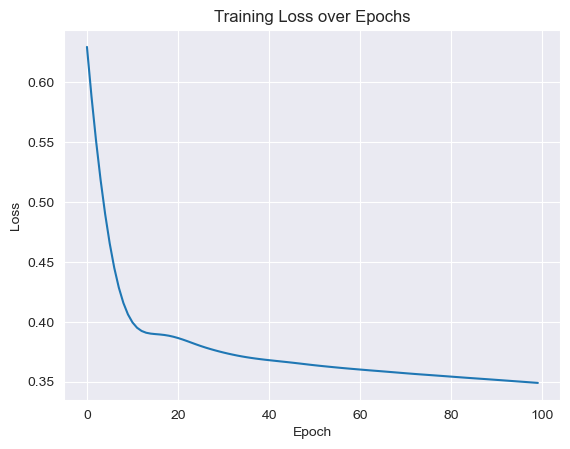

In [9]:
plt.figure()
plt.plot(loss_history)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
os.makedirs("../../results/figures", exist_ok=True)
plt.savefig("../results/figures/nn_training_loss.png")
plt.show()


In [10]:
pd.DataFrame({
    "Prediction": predictions.numpy().flatten(),
    "Actual": y_test_tensor.numpy().flatten()
}).head()


,Prediction,Actual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
